In [37]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

!which python


/home/green/ENV3/bin/python


In [38]:
def get_data(content, tag="multiprocessing_mergesort"):
    """
    TBD

    :param content:
    :type content:
    :param name:
    :type name:
    :return:
    :rtype:
    """
    found = []
    lines = [line for line in content if "# csv" in line]

    for line in lines[1:]:
        entries = line.split(",")
        entry = [entries[a] for a in [1, 3, 9]]
        time= entry[1]
        name = entry[2]
        processes, size, count = entry[0].split(tag)[1].split("_")[1:]
        
        entry = [
                 int(processes),
                 #int(size),
                 #int(count),
                 float(time),
                 name
                 ]
        found.append(entry)
    return found

def read_data(log, tag="multiprocessing_mergesort"):
    f = open(f"log/{log}.log", "r")
    content = f.read().splitlines()
    data = get_data(content, tag=tag)
    return data

In [43]:
data = []

files = ["alex", "gregor"]

for file in files:
    content = read_data(file)
    data = data + content
        
# data


In [44]:
df = pd.DataFrame(data = data, 
                  columns = ["processors", "time", "name"])
df

,processors,time,name
0,1,0.389,alex
1,1,0.319,alex
2,1,0.322,alex
3,1,0.318,alex
4,1,0.315,alex
...,...,...,...
435,32,0.025,gregor
436,32,0.023,gregor
437,32,0.023,gregor
438,32,0.024,gregor


<AxesSubplot:xlabel='processors', ylabel='time'>

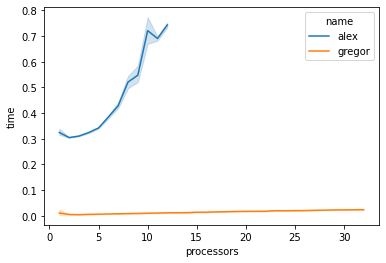

In [45]:
sns.lineplot(data=df, x="processors", y="time", hue="name")
